In [1]:
from pyforest import *

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')
print(df.shape)
df.head()

<IPython.core.display.Javascript object>

(768, 9)


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.drop('class', axis=1)
y = df['class']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

<IPython.core.display.Javascript object>

In [5]:
classifier1 = LogisticRegression(max_iter=1000)

<IPython.core.display.Javascript object>

In [6]:
classifier2 = svm.SVC(kernel='linear', probability=True)

<IPython.core.display.Javascript object>

In [7]:
probas1_ = classifier1.fit(X_train, y_train).predict_proba(X_test)
probas2_ = classifier2.fit(X_train, y_train).predict_proba(X_test)

In [9]:
# Computing the ROC and the AOC for logistic
# fpr = false positive rates
# tpr = true positive rates

from sklearn.metrics import roc_curve, auc

fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print('Area under the ROC curve: %f' %roc_auc1)

Area under the ROC curve: 0.824291


In [10]:
# Computing the ROC and the AOC for SVM
# fpr = false positive rates
# tpr = true positive rates

from sklearn.metrics import roc_curve, auc

fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print('Area under the ROC curve: %f' %roc_auc2)

Area under the ROC curve: 0.825385


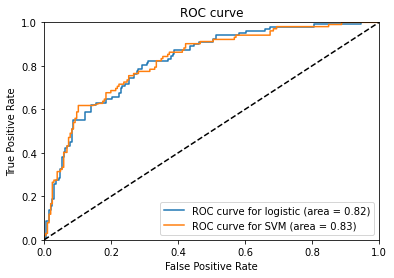

In [11]:
# PLotting the ROC curve

import pylab as pl

pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' %roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for SVM (area = %0.2f)' %roc_auc2)
pl.plot([0,1], [0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC curve')
pl.legend(loc='lower right')
pl.show()